In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer


In [35]:
df = pd.read_csv( 'merc.csv' )
df.shape

(1502, 9)

In [36]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [37]:
df.isna().sum()


,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [38]:
df.isna().sum() / df.shape[ 0]


,0
model,0.0
year,0.0
price,0.0
transmission,0.0
mileage,0.0
fuelType,0.0
tax,0.0
mpg,0.0
engineSize,0.0


In [39]:
df_miss_row = df[df.isna().sum(axis= 1) >= 5]
df_miss_row.shape


(0, 9)

In [40]:
df = df[df.isna().sum(axis= 1) < 5]
df.shape


(1502, 9)

In [41]:
df[df.isna().sum(axis= 1) >= 5]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [42]:
X_train, X_test = train_test_split(df, test_size= 0.2 , random_state=42)

In [43]:
imp_const_0 = SimpleImputer(strategy= 'constant' , fill_value= 0)
zero_cols = ['mileage' , 'tax' ]
X_train[zero_cols] = imp_const_0.fit_transform(X_train[zero_cols])
X_train.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
538,GLA Class,2018,23000,Semi-Auto,10808,Diesel,145,56.5,2.1
1226,C Class,2019,26885,Semi-Auto,2622,Petrol,145,42.2,1.6
1114,CL Class,2018,19991,Semi-Auto,20297,Petrol,145,53.3,1.6
324,M Class,2015,21998,Semi-Auto,37963,Diesel,205,39.2,2.1
361,GLA Class,2016,17998,Semi-Auto,39017,Diesel,125,56.5,2.1


In [44]:
X_train[zero_cols].isna().sum()


,0
mileage,0
tax,0


In [45]:
imp_const_unknown = SimpleImputer(strategy= 'constant' , fill_value= 'unknown' )
unk_cols = ['model' ]
X_train[unk_cols] = imp_const_unknown.fit_transform(X_train[unk_cols])
X_train.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
538,GLA Class,2018,23000,Semi-Auto,10808,Diesel,145,56.5,2.1
1226,C Class,2019,26885,Semi-Auto,2622,Petrol,145,42.2,1.6
1114,CL Class,2018,19991,Semi-Auto,20297,Petrol,145,53.3,1.6
324,M Class,2015,21998,Semi-Auto,37963,Diesel,205,39.2,2.1
361,GLA Class,2016,17998,Semi-Auto,39017,Diesel,125,56.5,2.1


In [46]:
imp_median = SimpleImputer(strategy= 'median' )
med_cols = ['mpg' , 'engineSize' ]
X_train[med_cols] = imp_median.fit_transform(X_train[med_cols])
X_train.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
538,GLA Class,2018,23000,Semi-Auto,10808,Diesel,145,56.5,2.1
1226,C Class,2019,26885,Semi-Auto,2622,Petrol,145,42.2,1.6
1114,CL Class,2018,19991,Semi-Auto,20297,Petrol,145,53.3,1.6
324,M Class,2015,21998,Semi-Auto,37963,Diesel,205,39.2,2.1
361,GLA Class,2016,17998,Semi-Auto,39017,Diesel,125,56.5,2.1


In [47]:
X_train[med_cols].isna().sum()


,0
mpg,0
engineSize,0


In [49]:
imp_knn = KNNImputer(n_neighbors= 3)
num_columns = ['year' , 'mileage' , 'tax' , 'mpg' , 'engineSize' ]
X_train[num_columns] = imp_knn.fit_transform(X_train[num_columns])
X_train.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
538,GLA Class,2018.0,23000,Semi-Auto,10808.0,Diesel,145.0,56.5,2.1
1226,C Class,2019.0,26885,Semi-Auto,2622.0,Petrol,145.0,42.2,1.6
1114,CL Class,2018.0,19991,Semi-Auto,20297.0,Petrol,145.0,53.3,1.6
324,M Class,2015.0,21998,Semi-Auto,37963.0,Diesel,205.0,39.2,2.1
361,GLA Class,2016.0,17998,Semi-Auto,39017.0,Diesel,125.0,56.5,2.1


In [50]:
X_train.isna().sum()


,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [52]:
X_test[zero_cols] = imp_const_0.transform(X_test[zero_cols])
X_test[unk_cols] = imp_const_unknown.transform(X_test[unk_cols])
X_test[med_cols] = imp_median.transform(X_test[med_cols])
X_test[num_columns] = imp_knn.transform(X_test[num_columns])
X_train.to_csv( 'merc_train.csv' , index= False )
X_test.to_csv( 'merc_test.csv' , index= False )

In [53]:
df = pd.read_csv( 'merc_train.csv' )
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GLA Class,2018.0,23000,Semi-Auto,10808.0,Diesel,145.0,56.5,2.1
1,C Class,2019.0,26885,Semi-Auto,2622.0,Petrol,145.0,42.2,1.6
2,CL Class,2018.0,19991,Semi-Auto,20297.0,Petrol,145.0,53.3,1.6
3,M Class,2015.0,21998,Semi-Auto,37963.0,Diesel,205.0,39.2,2.1
4,GLA Class,2016.0,17998,Semi-Auto,39017.0,Diesel,125.0,56.5,2.1


In [54]:
import matplotlib.pyplot as plt


Histogram for year 


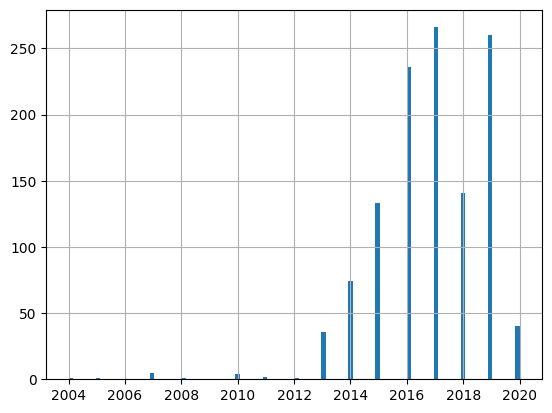

Histogram for price 


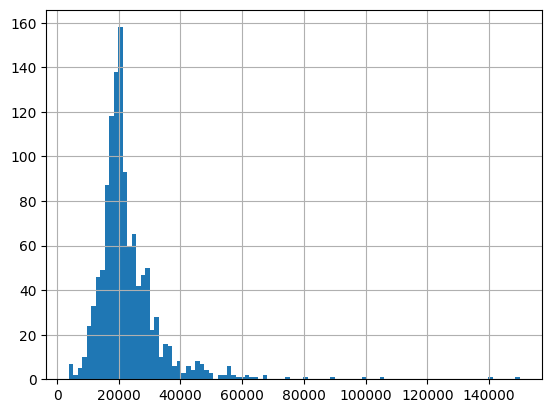

Histogram for mileage 


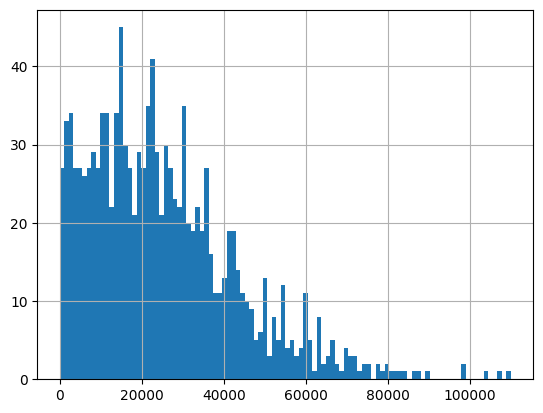

Histogram for tax 


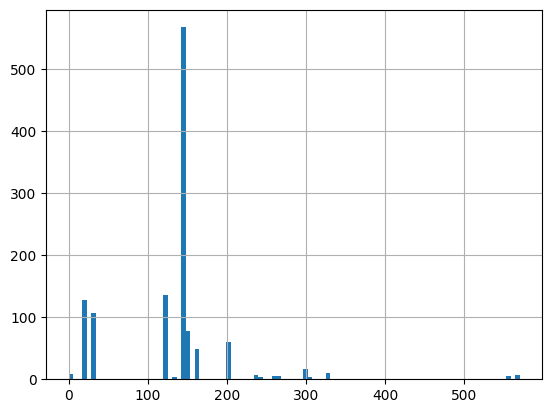

Histogram for mpg 


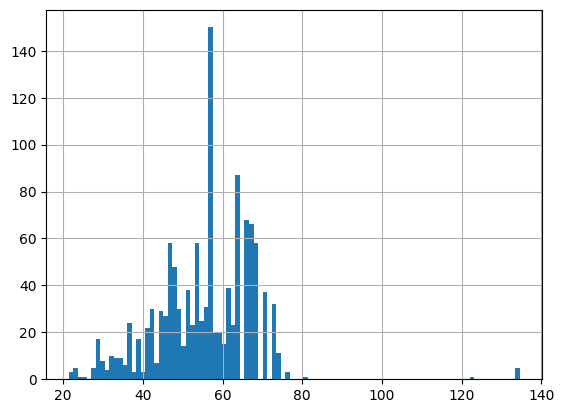

Histogram for engineSize 


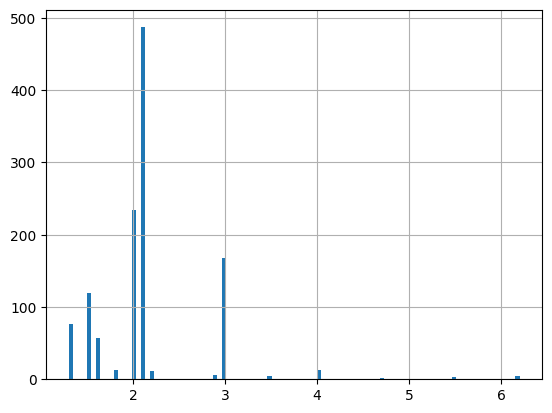

In [55]:
num_cols = ['year' , 'price' , 'mileage' , 'tax' , 'mpg' , 'engineSize' ]
for col in num_cols:
    print( f'Histogram for {col} ')
    df[col].hist(bins= 100 )
    plt.show()


In [56]:
def calculate_iqr_boundaries (series):
  q25 = series.quantile( 0.25 )
  q75 = series.quantile( 0.75 )
  iqr = q75 - q25
  boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
  return boundaries


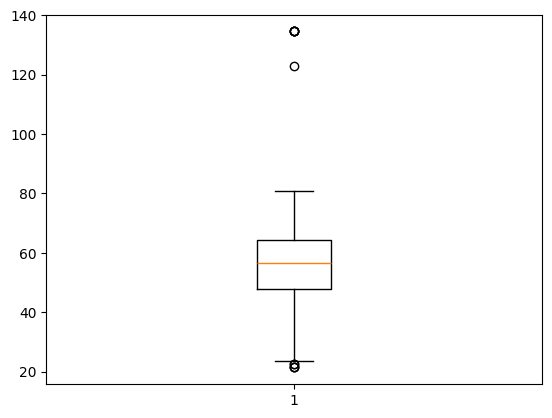

In [57]:
plt.boxplot(df.mpg)
plt.show()


In [58]:
mpg_bounds = calculate_iqr_boundaries(df[ 'mpg' ])
mpg_bounds


(np.float64(23.449999999999992), np.float64(88.65))

In [59]:
df_1 = df[(df[ 'mpg' ] >= mpg_bounds[ 0]) & (df[ 'mpg' ] <= mpg_bounds[ 1])]
print(df_1.shape[ 0])
print(df_1.shape[ 0] / df.shape[ 0])


1190
0.9908409658617818


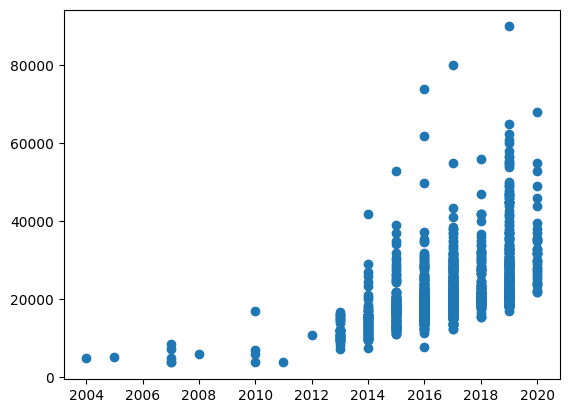

In [60]:
plt.scatter(df_1[ 'year' ], df_1[ 'price' ])


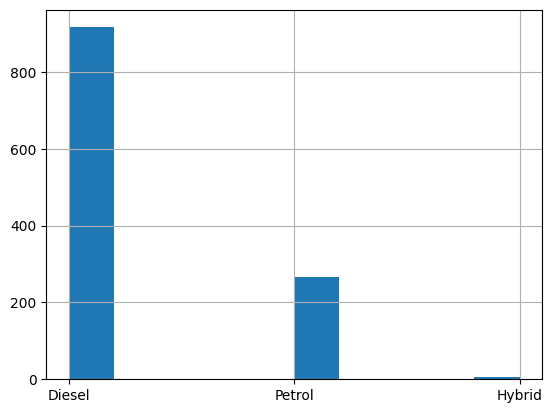

In [62]:
df_1['fuelType'].hist()
plt.show()


In [64]:
serie = df_1['fuelType'].value_counts()
serie


,count
fuelType,
Diesel,916
Petrol,267
Hybrid,7


In [65]:
serie = serie / serie.sum() * 100
serie


,count
fuelType,
Diesel,76.974790
Petrol,22.436975
Hybrid,0.588235


In [66]:
keep_cats = serie[serie > 5].index
keep_cats


Index(['Diesel', 'Petrol'], dtype='object', name='fuelType')

In [67]:
import numpy as np


<ipython-input-68-7dfbabb08842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['fuelType'] = np.where(df_1['fuelType'].isin(keep_cats), df_1['fuelType'], 'Other')


<Axes: >

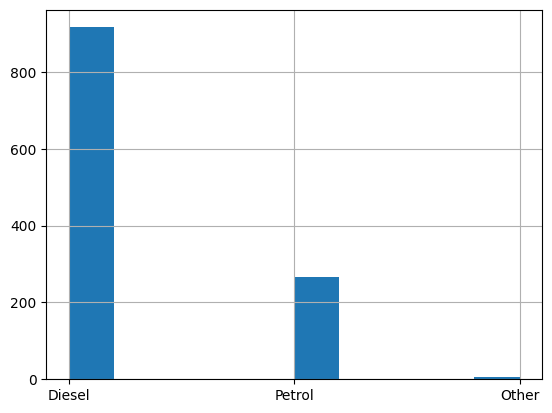

In [68]:
df_1['fuelType'] = np.where(df_1['fuelType'].isin(keep_cats), df_1['fuelType'], 'Other')
df_1['fuelType'].hist()


In [69]:
df_1.to_csv('merc_train.csv', index=False)


In [70]:
df = pd.read_csv( 'merc_train.csv' )
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GLA Class,2018.0,23000,Semi-Auto,10808.0,Diesel,145.0,56.5,2.1
1,C Class,2019.0,26885,Semi-Auto,2622.0,Petrol,145.0,42.2,1.6
2,CL Class,2018.0,19991,Semi-Auto,20297.0,Petrol,145.0,53.3,1.6
3,M Class,2015.0,21998,Semi-Auto,37963.0,Diesel,205.0,39.2,2.1
4,GLA Class,2016.0,17998,Semi-Auto,39017.0,Diesel,125.0,56.5,2.1


In [71]:
df_1 = df[[ 'price' , 'mileage' , 'tax' , 'mpg' ]]
df_1.describe()


,price,mileage,tax,mpg
count,1190.000000,1190.000000,1190.000000,1190.000000
mean,22583.784034,25286.237815,132.214286,55.154118
std,9200.627699,18261.024628,74.479920,11.106430
min,3790.000000,17.000000,0.000000,23.500000
25%,17492.000000,11371.250000,125.000000,47.900000
50%,20498.000000,22241.500000,145.000000,56.500000
75%,25797.250000,35026.750000,145.000000,64.200000
max,89999.000000,110000.000000,570.000000,80.700000


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [73]:
X_train = df[[ 'mileage' , 'tax' , 'mpg' ]]
y_train = df[ 'price' ]
X_train_s = scaler.fit_transform(X_train)
X_train_s


array([[-0.79318249,  0.17173877,  0.12123141],
       [-1.2416481 ,  0.17173877, -1.16685231],
       [-0.27333272,  0.17173877, -0.1670111 ],
       ...,
       [ 0.73941287, -1.50727155,  0.81481495],
       [ 1.48053709, -1.50727155,  0.81481495],
       [ 1.34291852, -1.50727155,  1.23817114]])

In [74]:
df_X_s = pd.DataFrame(X_train_s, columns=X_train.columns)
df_X_s.describe()


,mileage,tax,mpg
count,1.190000e+03,1.190000e+03,1.190000e+03
mean,6.866589e-17,-1.134480e-16,4.657339e-16
std,1.000420e+00,1.000420e+00,1.000420e+00
min,-1.384362e+00,-1.775913e+00,-2.851269e+00
25%,-7.623251e-01,-9.690288e-02,-6.534203e-01
50%,-1.668043e-01,1.717388e-01,1.212314e-01
75%,5.336287e-01,1.717388e-01,8.148150e-01
max,4.640998e+00,5.880374e+00,2.301065e+00


In [75]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()


In [76]:
X_train_mm = mmscaler.fit_transform(X_train)
X_train_mm


array([[0.09811516, 0.25438596, 0.57692308],
       [0.02368548, 0.25438596, 0.32692308],
       [0.18439213, 0.25438596, 0.52097902],
       ...,
       [0.35247265, 0.03508772, 0.71153846],
       [0.47547348, 0.03508772, 0.71153846],
       [0.45263359, 0.03508772, 0.79370629]])

In [79]:
df_sc_x = pd.DataFrame(X_train_mm, columns=X_train.columns)
df_sc_x.describe()


,mileage,tax,mpg
count,1190.000000,1190.000000,1190.000000
mean,0.229756,0.231955,0.553394
std,0.166035,0.130667,0.194168
min,0.000000,0.000000,0.000000
25%,0.103236,0.219298,0.426573
50%,0.202072,0.254386,0.576923
75%,0.318320,0.254386,0.711538
max,1.000000,1.000000,1.000000


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [88]:
lr3 = LinearRegression()
lr3.fit(X_train_mm, y_train)
y_pred = lr3.predict(X_train_mm)
mean_squared_error(y_train, y_pred)


44337697.70188171

In [89]:
df = pd.read_csv( 'merc_train.csv' )
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GLA Class,2018.0,23000,Semi-Auto,10808.0,Diesel,145.0,56.5,2.1
1,C Class,2019.0,26885,Semi-Auto,2622.0,Petrol,145.0,42.2,1.6
2,CL Class,2018.0,19991,Semi-Auto,20297.0,Petrol,145.0,53.3,1.6
3,M Class,2015.0,21998,Semi-Auto,37963.0,Diesel,205.0,39.2,2.1
4,GLA Class,2016.0,17998,Semi-Auto,39017.0,Diesel,125.0,56.5,2.1


In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1190 non-null   object 
 1   year          1190 non-null   float64
 2   price         1190 non-null   int64  
 3   transmission  1190 non-null   object 
 4   mileage       1190 non-null   float64
 5   fuelType      1190 non-null   object 
 6   tax           1190 non-null   float64
 7   mpg           1190 non-null   float64
 8   engineSize    1190 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 83.8+ KB


In [91]:
df.describe(include=[ 'object' ])


,model,transmission,fuelType
count,1190,1190,1190
unique,21,3,3
top,C Class,Semi-Auto,Diesel
freq,280,828,916


In [93]:
cat_features = ['model' , 'transmission' , 'fuelType' ]
for feat in cat_features:
  print( f' {feat} : {df[feat].unique()} ')


 model : [' GLA Class' ' C Class' ' CL Class' ' M Class' ' A Class' ' GLC Class'
 ' V Class' ' E Class' ' GLE Class' ' S Class' ' CLS Class' ' SLK'
 ' B Class' ' X-CLASS' ' SL CLASS' ' GLB Class' ' GLS Class' ' CLA Class'
 ' GL Class' ' G Class' ' CLC Class'] 
 transmission : ['Semi-Auto' 'Automatic' 'Manual'] 
 fuelType : ['Diesel' 'Petrol' 'Other'] 


In [94]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [95]:
df[ 'model_le' ] = encoder.fit_transform(df[ 'model' ])
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_le
0,GLA Class,2018.0,23000,Semi-Auto,10808.0,Diesel,145.0,56.5,2.1,10
1,C Class,2019.0,26885,Semi-Auto,2622.0,Petrol,145.0,42.2,1.6,2
2,CL Class,2018.0,19991,Semi-Auto,20297.0,Petrol,145.0,53.3,1.6,3
3,M Class,2015.0,21998,Semi-Auto,37963.0,Diesel,205.0,39.2,2.1,15
4,GLA Class,2016.0,17998,Semi-Auto,39017.0,Diesel,125.0,56.5,2.1,10


In [96]:
encoder.classes_


array([' A Class', ' B Class', ' C Class', ' CL Class', ' CLA Class',
       ' CLC Class', ' CLS Class', ' E Class', ' G Class', ' GL Class',
       ' GLA Class', ' GLB Class', ' GLC Class', ' GLE Class',
       ' GLS Class', ' M Class', ' S Class', ' SL CLASS', ' SLK',
       ' V Class', ' X-CLASS'], dtype=object)

In [97]:
for i, e in enumerate(encoder.classes_):
  print( f' {i} : {e} ')


 0 :  A Class 
 1 :  B Class 
 2 :  C Class 
 3 :  CL Class 
 4 :  CLA Class 
 5 :  CLC Class 
 6 :  CLS Class 
 7 :  E Class 
 8 :  G Class 
 9 :  GL Class 
 10 :  GLA Class 
 11 :  GLB Class 
 12 :  GLC Class 
 13 :  GLE Class 
 14 :  GLS Class 
 15 :  M Class 
 16 :  S Class 
 17 :  SL CLASS 
 18 :  SLK 
 19 :  V Class 
 20 :  X-CLASS 


In [98]:
from sklearn.preprocessing import OneHotEncoder


In [100]:
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
ft = ohe.fit_transform(df[[ 'fuelType' ]])
df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft.head()


,fuelType_Other,fuelType_Petrol
0,0.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0


In [101]:
df_1 = pd.concat([df, df_ft], axis= 1)
df_1


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_le,fuelType_Other,fuelType_Petrol
0,GLA Class,2018.0,23000,Semi-Auto,10808.0,Diesel,145.0,56.5,2.1,10,0.0,0.0
1,C Class,2019.0,26885,Semi-Auto,2622.0,Petrol,145.0,42.2,1.6,2,0.0,1.0
2,CL Class,2018.0,19991,Semi-Auto,20297.0,Petrol,145.0,53.3,1.6,3,0.0,1.0
3,M Class,2015.0,21998,Semi-Auto,37963.0,Diesel,205.0,39.2,2.1,15,0.0,0.0
4,GLA Class,2016.0,17998,Semi-Auto,39017.0,Diesel,125.0,56.5,2.1,10,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,A Class,2019.0,21490,Automatic,23000.0,Diesel,145.0,67.3,1.5,0,0.0,0.0
1186,CL Class,2017.0,20500,Automatic,14611.0,Diesel,145.0,67.3,2.1,3,0.0,0.0
1187,C Class,2015.0,14500,Semi-Auto,38783.0,Diesel,20.0,64.2,2.1,2,0.0,0.0
1188,A Class,2014.0,13799,Semi-Auto,52311.0,Diesel,20.0,64.2,2.1,0,0.0,0.0


In [103]:
df_1['fuelType_Petrol']

,fuelType_Petrol
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
1185,0.0
1186,0.0
1187,0.0
1188,0.0
